In [1]:
!pip install openai

In [2]:
import torch
from diffusers import StableDiffusionXLPipeline
from PIL import Image
from ip_adapter import IPAdapterXL

ModuleNotFoundError: No module named 'diffusers'

In [4]:
import os
import openai
import json

In [5]:
base_model_path = "stabilityai/stable-diffusion-xl-base-1.0"
image_encoder_path = "InvokeAI/ip_adapter_sdxl_image_encoder"
ip_ckpt = "download and put model path
device = "cuda"



SyntaxError: EOL while scanning string literal (3908553491.py, line 3)

In [59]:
respo_format = '''{"Character_state={character_1=[],character_2=[],....},people": {"male":0, "female":0}, "positive prompt": {}, "negative prompt": {}}'''
given_task = f"""
Stable Diffusion is a deep learning model for generating images based on text descriptions and can be applied to inpainting, outpainting, and image-to-image translations guided by text prompts. Developing a good prompt is essential for creating high-quality images.

A good prompt should be detailed and specific, including keyword categories such as subject, medium, style, artist, website, resolution, additional details, color, and lighting. Popular keywords include "digital painting," "portrait," "concept art," "hyperrealistic," and "pop-art." Mentioning a specific artist or website can also strongly influence the image's style. For example, a prompt for an image of Emma Watson as a sorceress could be: "Emma Watson as a powerful mysterious sorceress, casting lightning magic, detailed clothing, digital painting, hyperrealistic, fantasy, surrealist, full body."

Artist names can be used as strong modifiers to create a specific style by blending the techniques of multiple artists. Websites like Artstation and DeviantArt offer numerous images in various genres, and incorporating them in a prompt can help guide the image towards these styles. Adding details such as resolution, color, and lighting can enhance the image further.

Building a good prompt is an iterative process. Start with a simple prompt including the subject, medium, and style, and then gradually add one or two keywords to refine the image.

Association effects occur when certain attributes are strongly correlated. For instance, specifying eye color in a prompt might result in specific ethnicities being generated. Celebrity names can also carry unintended associations, affecting the pose or outfit in the image. Artist names, too, can influence the generated images.

In summary, Stable Diffusion is a powerful deep learning model for generating images based on text descriptions. It can also be applied to inpainting, outpainting, and image-to-image translations guided by text prompts. Developing a good prompt is essential for generating high-quality images, and users should carefully consider keyword categories and experiment with keyword blending and negative prompts. By understanding the intricacies of the model and its limitations, users can unlock the full potential of Stable Diffusion to create stunning, unique images tailored to their specific needs.

--

Please use this information as a reference for the task you will ask me to do after.

--

Below is a list of prompts that can be used to generate images with Stable Diffusion.

- Examples -

"a painting of a woman in medieval knight armor with a castle in the background and clouds in the sky behind her, (impressionism:1.1), ('rough painting style':1.5), ('large brush texture':1.2), ('palette knife':1.2), (dabbing:1.4), ('highly detailed':1.5), professional majestic painting by Vasily Surikov, Victor Vasnetsov, (Konstantin Makovsky:1.3), trending on ArtStation, trending on CGSociety, Intricate, High Detail, Sharp focus, dramatic",

"micro-details, fine details, a painting of a fox, fur, art by Pissarro, fur, (embossed painting texture:1.3), (large brush strokes:1.6), (fur:1.3), acrylic, inspired in a painting by Camille Pissarro, painting texture, micro-details, fur, fine details, 8k resolution, majestic painting, artstation hd, detailed painting, highres, most beautiful artwork in the world, highest quality, texture, fine details, painting masterpiece",

"(dark shot:1.1), epic realistic, broken old boat in big storm, illustrated by herg, style of tin tin comics, pen and ink, female pilot, art by greg rutkowski and artgerm, soft cinematic light, adobe lightroom, photolab, hdr, intricate, highly detailed, (depth of field:1.4), faded, (neutral colors:1.2), (hdr:1.4), (muted colors:1.2), hyperdetailed, (artstation:1.4), cinematic, warm lights, dramatic light, (intricate details:1.1), complex background, (rutkowski:0.66), (teal and orange:0.4), (intricate details:1.12), hdr, (intricate details, hyperdetailed:1.15)"


Negative prompt will also be used in creating images. Negative prompt is opposite of prompt . it is used to prohibit things in image with keywords. Below is example of how negative prompt can be written for generating images with special characteristics.

Example-

“(deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, (mutated hands and fingers:1.4), disconnected limbs, mutation, mutated, ugly, disgusting, blurry, amputation. tattoo, watermark, text, anime, illustration, sketch, 3d, vector art, cartoon, painting”,

“(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime, mutated hands and fingers:1.4), (deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, disconnected limbs, mutation, mutated, ugly, disgusting, amputation”,

"Ugly, blurred, disfigured, deformed, blurry, repetitive, blur, bad anatomy, bad proportions, blender, cropped, low-res, vignette, out of shot, out of focus, gaussian, grainy, noisy, (((text))), ((writing)), written language, watermark, logo, signature, brand, artist name, username, oversaturation, over shadow, low contrast, underexposed, overexposed, cropped, weird perspective, wrong perspective, wrong sizes, top view, Amputee, dismembered, distorted, blind, bad eyes, ugly eyes, two head, two faces, distorted face, poorly drawn hands, poorly drawn feet, poorly drawn face, mutation, mutated, ((extra limb)), poorly drawn hands, missing limb, floating limbs, disconnected limbs, malformed hands, long neck, long body, ((((mutated hands and fingers)))), too many fingers"


- Explanation -

The following elements are a description of the prompt structure. You should not include the label of a section like "Scene description:".

Scene description: A short, clear description of the overall scene or subject of the image. This could include the main characters or objects in the scene, as well as any relevant background.

Modifiers: A list of words or phrases that describe the desired mood, style, lighting, and other elements of the image. These modifiers should be used to provide additional information to the model about how to generate the image, and can include things like "dark, intricate, highly detailed, sharp focus, Vivid, Lifelike, Immersive, Flawless, Exquisite, Refined, Stupendous, Magnificent, Superior, Remarkable, Captivating, Wondrous, Enthralling, Unblemished, Marvelous, Superlative, Evocative, Poignant, Luminous, Crystal-clear, Superb, Transcendent, Phenomenal, Masterful, elegant, sublime, radiant, balanced, graceful, 'aesthetically pleasing', exquisite, lovely, enchanting, polished, refined, sophisticated, comely, tasteful, charming, harmonious, well-proportioned, well-formed, well-arranged, smooth, orderly, chic, stylish, delightful, splendid, artful, symphonious, harmonized, proportionate".

Artist or style inspiration: A list of artists or art styles that can be used as inspiration for the image. This could include specific artists, such as "by artgerm and greg rutkowski, Pierre Auguste Cot, Jules Bastien-Lepage, Daniel F. Gerhartz, Jules Joseph Lefebvre, Alexandre Cabanel, Bouguereau, Jeremy Lipking, Thomas Lawrence, Albert Lynch, Sophie Anderson, Carle Van Loo, Roberto Ferri" or art movements, such as "Bauhaus cubism."

Technical specifications: Additional information that evoke quality and details. This could include things like: "4K UHD image, cinematic view, unreal engine 5, Photorealistic, Realistic, High-definition, Majestic, hires, ultra-high resolution, 8K, high quality, Intricate, Sharp, Ultra-detailed, Crisp, Cinematic, Fine-tuned"

“text, watermark, signature, (NSFW:1.2), (large breasts, medium breasts, nipples, nude:1.2), Nudity, Naked, Au naturel, Watermark, Text, deformed, bad anatomy, disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet, abnormal fingers”

- Prompt Structure -

The structure sequence can vary. However, the following is a good reference:

[Scene description]. [Modifiers], [Artist or style inspiration], [Technical specifications]

- Special Modifiers -

In the examples you can notice that some terms are closed between (). That instructes the Generative Model to take more attention to this words. If there are more (()) it means more attention.

Similarly, you can find a structure like this (word:1.4). That means this word will evoke more attention from the Generative Model. The number "1.4" means 140%. Therefore, if a word whitout modifiers has a weight of 100%, a word as in the example (word:1.4), will have a weight of 140%.

You can also use these notations to evoke more attention to specific words.

Also instead of the given name use a common name closely related to the description of the character


Your Task:
1. Your task is to understand the given panel story and create prompt for manga style images for Current PANEL Story. 
2. The prompt should be more focused on PANEL description 
3. Prompts must follow the story, character expressions (intentions) must be clear
4. Prompt must have proper weights to important details 
5. Do NOT Use Full stop, use comma instead. Avoid long sentences (100 word limit)
6. OUTPUT MUST follow given Output Format
7. Use character description to generate characters in image.
8. Generate the next prompt by taking care of environment(Keep the background constant if not specified in panel description)
9. Generate as less text as possible
10.Character state is going to contain character description but modified for example:- change of clothes, change in physical appearences like bruised or fractured and do not update the actions there
11. While defining prompt with character also put their character state

Positive Prompt Format: Basic prompt (be creative), Modifiers, Technical specifications, Special Modifiers 

Output format: 
{json.loads(respo_format)}

Character_state={json.load(character_state)}

Previous PANEL Story:
{json.load(panel_story)}
"""

In [70]:
def prompt_gen(user_content, system_content=None, max_token=1200, temperature=0.3, models=['gpt-4-0613', 'gpt-4-0314', 'gpt-4'], model_number=0):
    if not system_content:
        system_content = "You are a prompt engineer, you can write prompt for anything. Help me write prompt for my story."
    
    completion = openai.ChatCompletion.create(
        model=models[model_number],nhi e
        messages=[
            {"role": "system", "content": system_content},
            {"role": "user", "content": user_content}
        ],
        max_tokens=max_token,
        temperature=temperature
    )
    gen_prompt = completion.choices[0].message['content']
    gen_prompt = gen_prompt.replace("Output:", "")
    
    # Work directly with the string
    if gen_prompt:
        try:
            output_dict = eval(gen_prompt)  # Using eval to convert the string to a dictionary
            character_state = output_dict.get("Character_state", {})
            positive_prom = output_dict.get("positive prompt", )
            negative_prom = output_dict.get("negative prompt", )
            print("Character State:", character_state)
            print("positive prompt:", positive_prom)
            print("negative prompt:", negative_prom)           
            return "working !!"  # or return any other value as needed
        except Exception as e:
            print(f"Error processing string: {e}")
            return "Error processing string"
    else:
        print("Generated prompt is empty.")
        return "Empty prompt"

In [71]:
prompt_gen(given_task)

Character State: {'Raj': ['teenager', 'blue jeans', 'black hair', 'black jacket']}
positive prompt: Raj, a teenager with black hair and a black jacket, swinging on a swing, ('joyful':1.2), ('carefree':1.3), ('outdoor':1.5), ('daylight':1.4), ('casual':1.3), ('park':1.2), ('anime style':1.5), ('manga style':1.5), ('high resolution':1.3), ('colorful':1.2)
negative prompt: (nighttime:1.2), (indoor:1.3), (serious:1.2), (formal wear:1.3), (black and white:1.2), (low resolution:1.3), (watermark:1.2), (text:1.2), (blurry:1.3), (distorted:1.2), (disfigured:1.2), (poorly drawn:1.3), (extra limb:1.2), (ugly:1.2), (missing limb:1.2), (floating limbs:1.2), (disconnected limbs:1.2), (malformed hands:1.2), (long neck:1.2), (mutated hands and fingers:1.2), (bad hands:1.2), (missing fingers:1.2), (cropped:1.2), (worst quality:1.2), (low quality:1.2), (mutation:1.2), (poorly drawn:1.2), (fused hand:1.2), (missing hand:1.2), (disappearing arms:1.2), (disappearing thigh:1.2), (disappearing calf:1.2), (di

'working !!'

In [70]:
from diffusers import DiffusionPipeline
import torch 

ModuleNotFoundError: No module named 'diffusers'

In [71]:
class GenerateImage:
    def __init__(self, api_key):
        openai.api_key = api_key
        self.previous_panles={}
        self.character_state = '''{"Raj": ["teenager", "blue jeans", "black hair", "black jacket"]}'''
        self.base_model = "stabilityai/stable-diffusion-xl-base-1.0"

    def prompt_gen(self, user_content, system_content=None, max_token=1200, temperature=0.3, models=['gpt-4-0613', 'gpt-4-0314', 'gpt-4'], model_number=0):
        if not system_content:
            system_content = "You are a prompt engineer, you can write a prompt for anything. Help me write a prompt for my story."

        completion = openai.chat.completions.create(
            model=models[model_number],
            messages=[
                {"role": "system", "content": system_content},
                {"role": "user", "content": user_content}
            ],
            max_tokens=max_token,
            temperature=temperature
        )

        gen_prompt = completion.choices[0].message.content
        gen_prompt = gen_prompt.replace("Output:", "")
        
        # Work directly with the string
        if gen_prompt:
            try:
                output_dict = eval(gen_prompt)  # Using eval to convert the string to a dictionary
                character_state = output_dict.get("Character_state", {})
                positive_prom = output_dict.get("positive prompt", "")
                negative_prom = output_dict.get("negative prompt", "")
                print("Character State:", character_state)
                print("positive prompt:", positive_prom)
                print("negative prompt:", negative_prom)
                return character_state, positive_prom, negative_prom  # or return any other value as needed
            except Exception as e:
                print(f"Error processing string: {e}")
                return "Error processing string"
        else:
            print("Generated prompt is empty.")
            return "Empty prompt"

    def image_gen_lora(self, pos_prom, neg_prom, pipe):
        image = pipeline(
        prompt=prompt, negative_prompt=negative_prompt, num_inference_steps=num_inference_steps,
        generator=generator, guidance_scale=guidance_scale
        ).images[0]
        image.save("Kamepan.png")    

    def start(self, prompt):
        task=self.make_prompt(self.previous_panles,prompt,self.character_state)
        char_state,pos_prom,neg_prom=self.prompt_gen(task)
        pipe=self.load_pipeline(self.base_model)
        image_gen_lora(pos_prom,neg_prom,pipe)
        print("working")        
    def load_pipeline(self,base_model_id):
        pipeline = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16).to("cuda")
        return pipeline
    def make_prompt(self,previous_panels,prompt,character_state):
    
        respo_format = '''{"Character_state={character_1=[],character_2=[],....},people": {"male":0, "female":0}, "positive prompt": {}, "negative prompt": {}}'''
        character_state=character_state
        given_task = f"""
        Stable Diffusion is a deep learning model for generating images based on text descriptions and can be applied to inpainting, outpainting, and image-to-image translations guided by text prompts. Developing a good prompt is essential for creating high-quality images.
        
        A good prompt should be detailed and specific, including keyword categories such as subject, medium, style, artist, website, resolution, additional details, color, and lighting. Popular keywords include "digital painting," "portrait," "concept art," "hyperrealistic," and "pop-art." Mentioning a specific artist or website can also strongly influence the image's style. For example, a prompt for an image of Emma Watson as a sorceress could be: "Emma Watson as a powerful mysterious sorceress, casting lightning magic, detailed clothing, digital painting, hyperrealistic, fantasy, surrealist, full body."

        Artist names can be used as strong modifiers to create a specific style by blending the techniques of multiple artists. Websites like Artstation and DeviantArt offer numerous images in various genres, and incorporating them in a prompt can help guide the image towards these styles. Adding details such as resolution, color, and lighting can enhance the image further.

        Building a good prompt is an iterative process. Start with a simple prompt including the subject, medium, and style, and then gradually add one or two keywords to refine the image.

        Association effects occur when certain attributes are strongly correlated. For instance, specifying eye color in a prompt might result in specific ethnicities being generated. Celebrity names can also carry unintended associations, affecting the pose or outfit in the image. Artist names, too, can influence the generated images.

        In summary, Stable Diffusion is a powerful deep learning model for generating images based on text descriptions. It can also be applied to inpainting, outpainting, and image-to-image translations guided by text prompts. Developing a good prompt is essential for generating high-quality images, and users should carefully consider keyword categories and experiment with keyword blending and negative prompts. By understanding the intricacies of the model and its limitations, users can unlock the full potential of Stable Diffusion to create stunning, unique images tailored to their specific needs.

        --

        Please use this information as a reference for the task you will ask me to do after.

        --

        Below is a list of prompts that can be used to generate images with Stable Diffusion.

        - Examples -

        "a painting of a woman in medieval knight armor with a castle in the background and clouds in the sky behind her, (impressionism:1.1), ('rough painting style':1.5), ('large brush texture':1.2), ('palette knife':1.2), (dabbing:1.4), ('highly detailed':1.5), professional majestic painting by Vasily Surikov, Victor Vasnetsov, (Konstantin Makovsky:1.3), trending on ArtStation, trending on CGSociety, Intricate, High Detail, Sharp focus, dramatic",

        "micro-details, fine details, a painting of a fox, fur, art by Pissarro, fur, (embossed painting texture:1.3), (large brush strokes:1.6), (fur:1.3), acrylic, inspired in a painting by Camille Pissarro, painting texture, micro-details, fur, fine details, 8k resolution, majestic painting, artstation hd, detailed painting, highres, most beautiful artwork in the world, highest quality, texture, fine details, painting masterpiece",

        "(dark shot:1.1), epic realistic, broken old boat in big storm, illustrated by herg, style of tin tin comics, pen and ink, female pilot, art by greg rutkowski and artgerm, soft cinematic light, adobe lightroom, photolab, hdr, intricate, highly detailed, (depth of field:1.4), faded, (neutral colors:1.2), (hdr:1.4), (muted colors:1.2), hyperdetailed, (artstation:1.4), cinematic, warm lights, dramatic light, (intricate details:1.1), complex background, (rutkowski:0.66), (teal and orange:0.4), (intricate details:1.12), hdr, (intricate details, hyperdetailed:1.15)"


        Negative prompt will also be used in creating images. Negative prompt is opposite of prompt . it is used to prohibit things in image with keywords. Below is example of how negative prompt can be written for generating images with special characteristics.

        Example-

        “(deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, (mutated hands and fingers:1.4), disconnected limbs, mutation, mutated, ugly, disgusting, blurry, amputation. tattoo, watermark, text, anime, illustration, sketch, 3d, vector art, cartoon, painting”,

        “(deformed iris, deformed pupils, semi-realistic, cgi, 3d, render, sketch, cartoon, drawing, anime, mutated hands and fingers:1.4), (deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, disconnected limbs, mutation, mutated, ugly, disgusting, amputation”,

        "Ugly, blurred, disfigured, deformed, blurry, repetitive, blur, bad anatomy, bad proportions, blender, cropped, low-res, vignette, out of shot, out of focus, gaussian, grainy, noisy, (((text))), ((writing)), written language, watermark, logo, signature, brand, artist name, username, oversaturation, over shadow, low contrast, underexposed, overexposed, cropped, weird perspective, wrong perspective, wrong sizes, top view, Amputee, dismembered, distorted, blind, bad eyes, ugly eyes, two head, two faces, distorted face, poorly drawn hands, poorly drawn feet, poorly drawn face, mutation, mutated, ((extra limb)), poorly drawn hands, missing limb, floating limbs, disconnected limbs, malformed hands, long neck, long body, ((((mutated hands and fingers)))), too many fingers"


        - Explanation -

        The following elements are a description of the prompt structure. You should not include the label of a section like "Scene description:".

        Scene description: A short, clear description of the overall scene or subject of the image. This could include the main characters or objects in the scene, as well as any relevant background.

        Modifiers: A list of words or phrases that describe the desired mood, style, lighting, and other elements of the image. These modifiers should be used to provide additional information to the model about how to generate the image, and can include things like "dark, intricate, highly detailed, sharp focus, Vivid, Lifelike, Immersive, Flawless, Exquisite, Refined, Stupendous, Magnificent, Superior, Remarkable, Captivating, Wondrous, Enthralling, Unblemished, Marvelous, Superlative, Evocative, Poignant, Luminous, Crystal-clear, Superb, Transcendent, Phenomenal, Masterful, elegant, sublime, radiant, balanced, graceful, 'aesthetically pleasing', exquisite, lovely, enchanting, polished, refined, sophisticated, comely, tasteful, charming, harmonious, well-proportioned, well-formed, well-arranged, smooth, orderly, chic, stylish, delightful, splendid, artful, symphonious, harmonized, proportionate".

        Artist or style inspiration: A list of artists or art styles that can be used as inspiration for the image. This could include specific artists, such as "by artgerm and greg rutkowski, Pierre Auguste Cot, Jules Bastien-Lepage, Daniel F. Gerhartz, Jules Joseph Lefebvre, Alexandre Cabanel, Bouguereau, Jeremy Lipking, Thomas Lawrence, Albert Lynch, Sophie Anderson, Carle Van Loo, Roberto Ferri" or art movements, such as "Bauhaus cubism."

        Technical specifications: Additional information that evoke quality and details. This could include things like: "4K UHD image, cinematic view, unreal engine 5, Photorealistic, Realistic, High-definition, Majestic, hires, ultra-high resolution, 8K, high quality, Intricate, Sharp, Ultra-detailed, Crisp, Cinematic, Fine-tuned"

        “text, watermark, signature, (NSFW:1.2), (large breasts, medium breasts, nipples, nude:1.2), Nudity, Naked, Au naturel, Watermark, Text, deformed, bad anatomy, disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet, abnormal fingers”
        
        - Prompt Structure -

        The structure sequence can vary. However, the following is a good reference:

        [Scene description]. [Modifiers], [Artist or style inspiration], [Technical specifications]

        - Special Modifiers -

        In the examples you can notice that some terms are closed between (). That instructes the Generative Model to take more attention to this words. If there are more (()) it means more attention.

        Similarly, you can find a structure like this (word:1.4). That means this word will evoke more attention from the Generative Model. The number "1.4" means 140%. Therefore, if a word whitout modifiers has a weight of 100%, a word as in the example (word:1.4), will have a weight of 140%.

        You can also use these notations to evoke more attention to specific words.

        Also instead of the given name use a common name closely related to the description of the character


        Your Task:
        1. Your task is to understand the given panel story and create prompt for manga style images for Current PANEL Story. 
        2. The prompt should be more focused on PANEL description 
        3. Prompts must follow the story, character expressions (intentions) must be clear
        4. Prompt must have proper weights to important details 
        5. Do NOT Use Full stop, use comma instead. Avoid long sentences (100 word limit)
        6. OUTPUT MUST follow given Output Format
        7. Use character description to generate characters in image.
        8. Generate the next prompt by taking care of environment(Keep the background constant if not specified in panel description)
        9 Generate as less text as possible
        10.Character state is going to contain character description but modified for example:- change of clothes, change in physical appearences like bruised or fractured and do not update the actions there
        11. While defining prompt with character also put their character state

        Positive Prompt Format: Basic prompt (be creative), Modifiers, Technical specifications, Special Modifiers 

        Output format: 
        {json.loads(respo_format)}

        Character_state={character_state}

        Previous PANEL Story:{previous_panels}

        Current Panel Story:{prompt}
        """   
        return given_task
    def makepanel(self,prompt,panel):
        panel=panel+"Panel:"+prompt
        return panel

In [72]:
sdxl=GenerateImage(OPENAI_API_KEY)

In [73]:
sdxl.start("raj looking toward sky")

Character State: {'Raj': ['teenager', 'blue jeans', 'black hair', 'black jacket']}
positive prompt: Raj, a teenager with black hair, wearing blue jeans and a black jacket, looking upward towards the sky, manga style, expressive, clear emotions, detailed, ('Raj':1.4), ('looking upward':1.3), ('sky':1.2), crisp, high-definition, ('manga style':1.5), ('expressive':1.3)
negative prompt: (deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, extra limb, missing limb, floating limbs, (mutated hands and fingers:1.4), disconnected limbs, mutation, mutated, ugly, disgusting, blurry, amputation. tattoo, watermark, text, anime, illustration, sketch, 3d, vector art, cartoon, painting


NameError: name 'load_pipeline' is not defined

In [3]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [4]:
# load SDXL pipeline
pipe = StableDiffusionXLPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    add_watermarker=False,
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
# load ip-adapter
ip_model = IPAdapterXL(pipe, image_encoder_path, ip_ckpt, device)

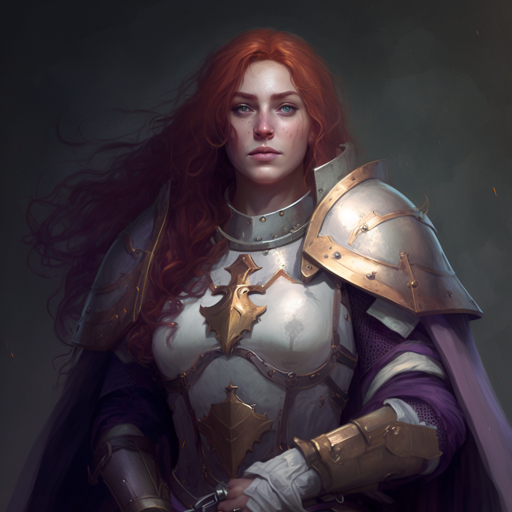

In [6]:
# read image prompt
image = Image.open("assets/images/woman.png")
image.resize((512, 512))

  0%|          | 0/30 [00:00<?, ?it/s]

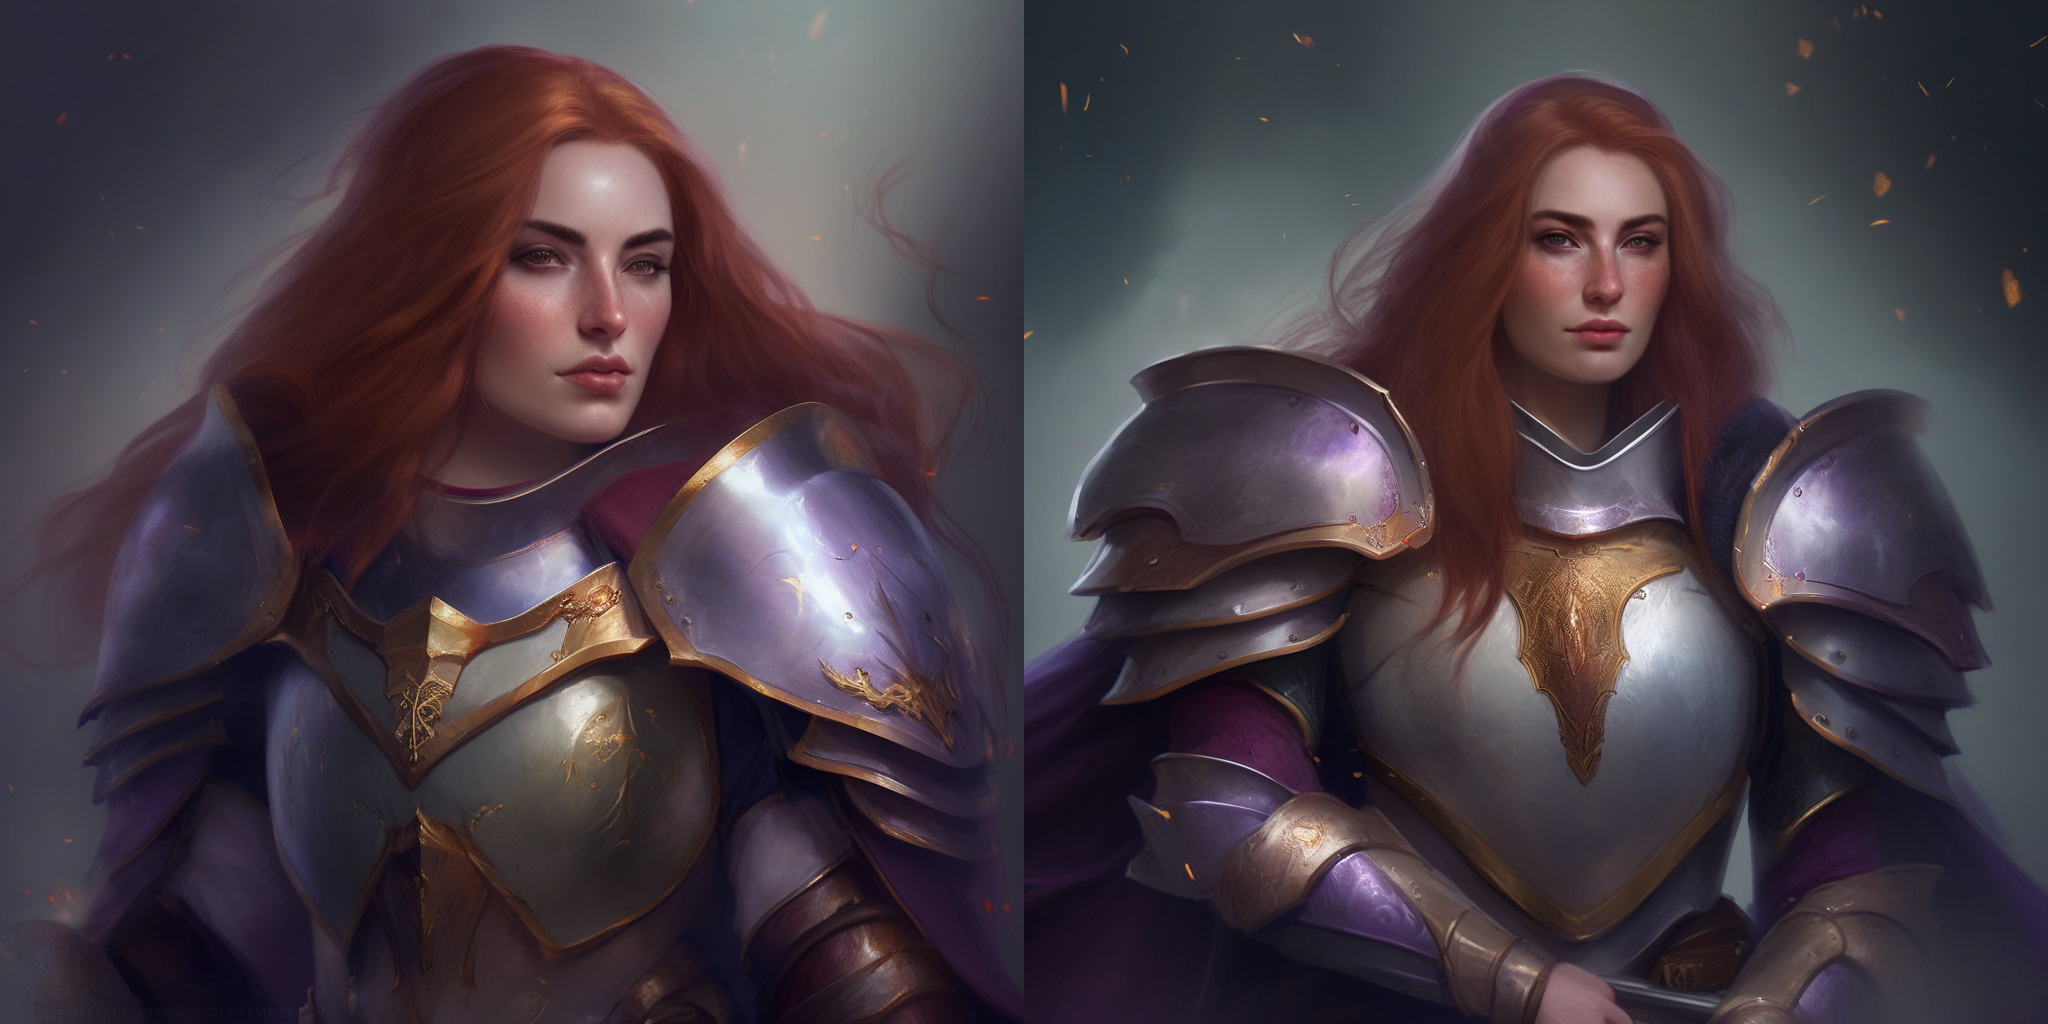

In [7]:
# generate image variations with only image prompt
num_samples = 2
images = ip_model.generate(pil_image=image, num_samples=num_samples, num_inference_steps=30, seed=420)
grid = image_grid(images, 1, num_samples)
grid

  0%|          | 0/30 [00:00<?, ?it/s]

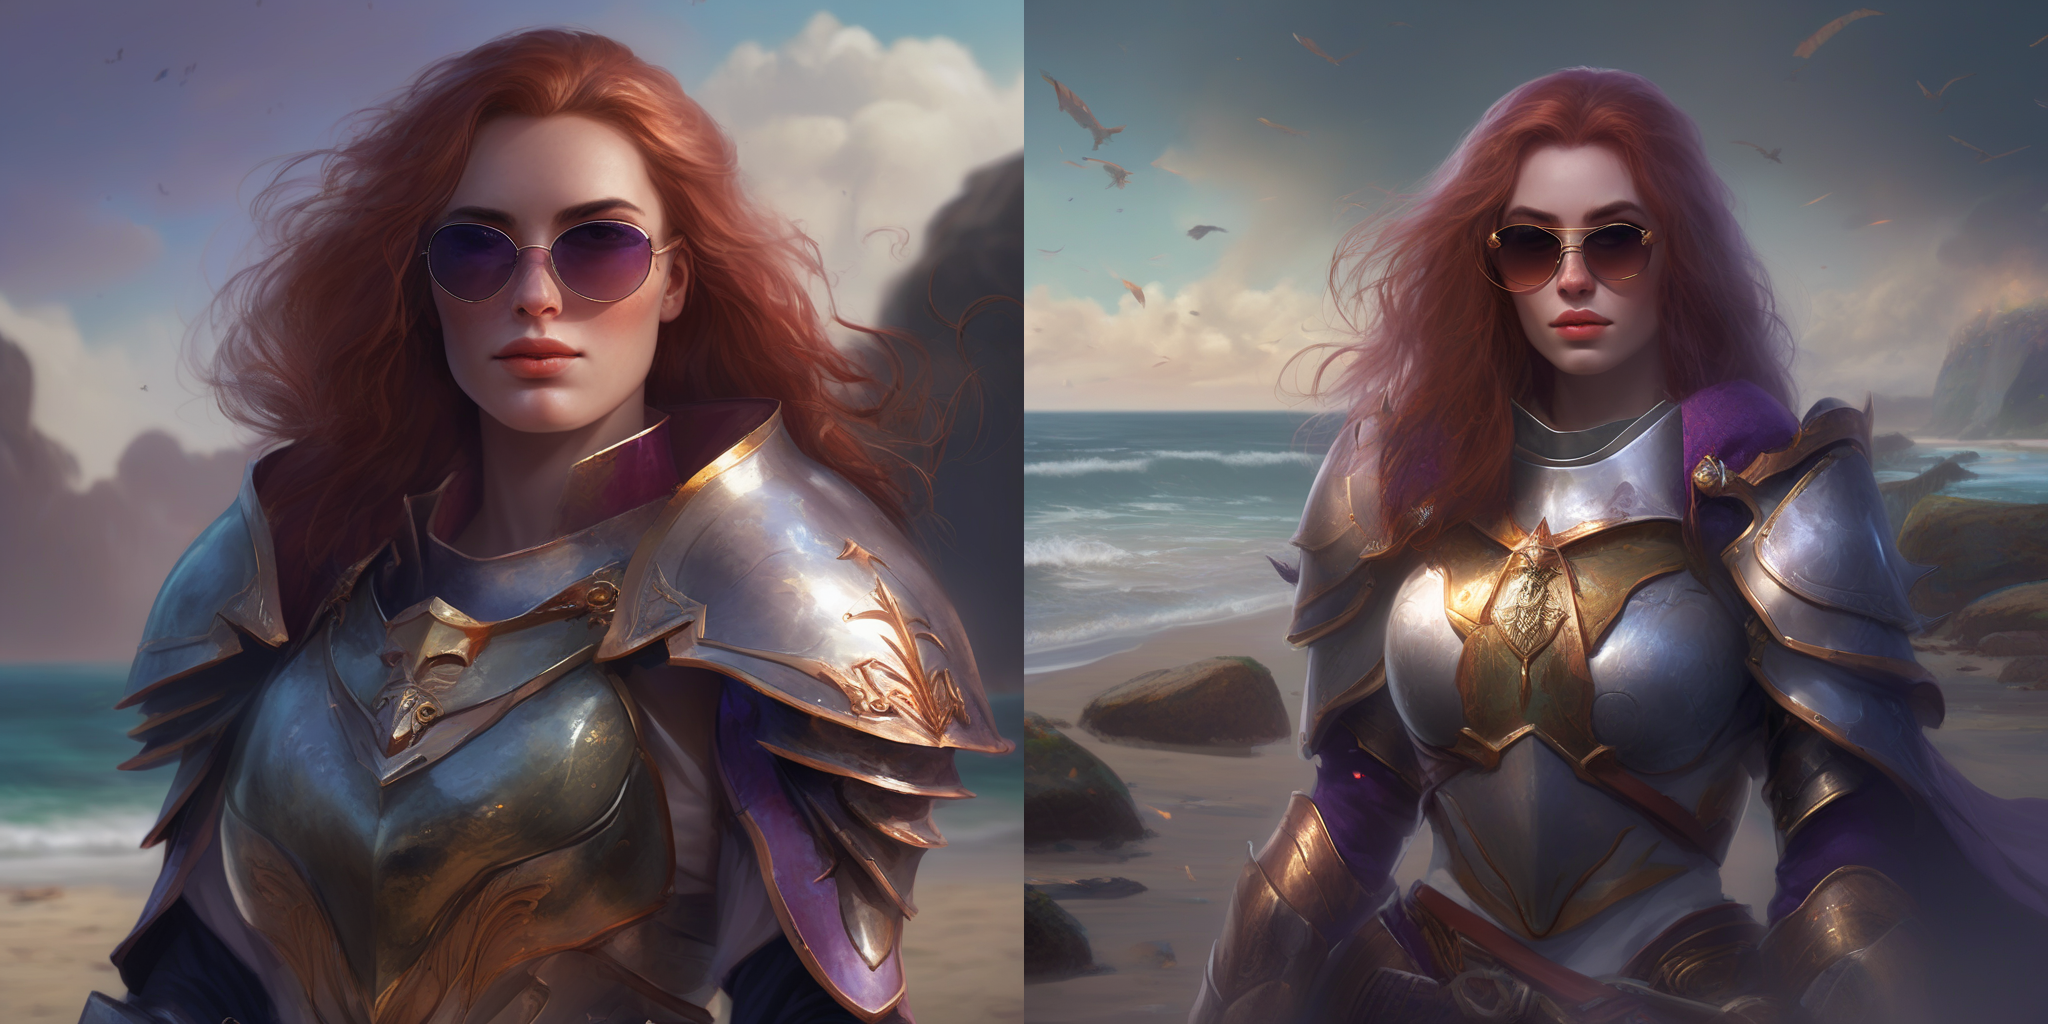

In [8]:
# multimodal prompts
images = ip_model.generate(pil_image=image, num_samples=num_samples, num_inference_steps=30, seed=420,
        prompt="best quality, high quality, wearing sunglasses on the beach", scale=0.6)
grid = image_grid(images, 1, num_samples)
grid